In [1]:
%matplotlib inline
import numpy
from astropy.io import fits
import h5py
from sys import  path
path.append("/home/hkli/work/mylib/")
import tool_box
from plot_tool import Image_Plot
import matplotlib.pyplot as plt

In [5]:
h5f = h5py.File("/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/data/redshift.hdf5","r")
z = h5f["redshift"].value
w = h5f["distance"].value
h5f.close()

In [6]:
a = 1./(1+z)
com_dist = 3000*w
dia_dist = com_dist*a

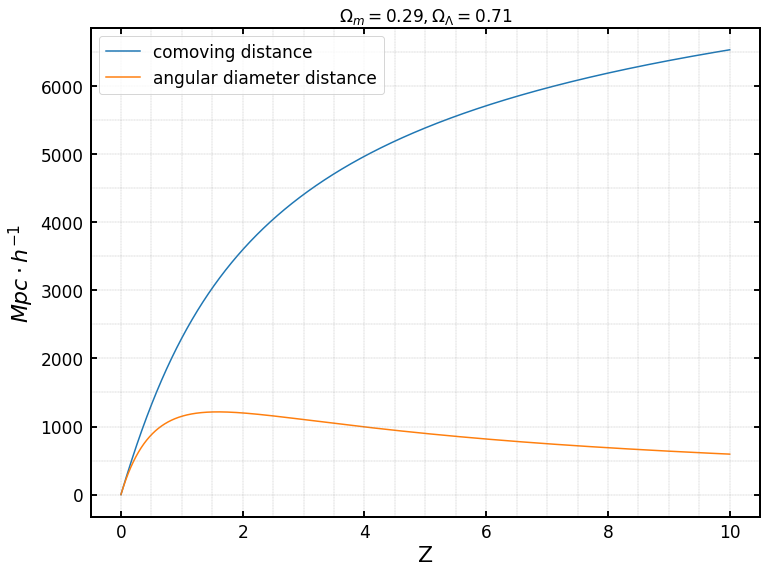

In [22]:
nx = 21
ny = 14

x = [i*0.5 for i in range(nx)]
y = [i*500 for i in range(ny)]

img = Image_Plot(fig_x=12,fig_y=9)
img.create_subfig(1,1)
img.axs[0][0].plot(z,com_dist,label="comoving distance")
img.axs[0][0].plot(z,dia_dist,label="angular diameter distance")
img.tick_label(0,0,1,"Z")
img.tick_label(0,0,0,"$Mpc \cdot h^{-1}$")
img.axs[0][0].set_title("$\Omega_m = 0.29, \Omega_\Lambda=0.71$",fontsize=img.legend_size)
ys = img.axs[0][0].set_ylim()
xs = img.axs[0][0].set_xlim()

for i in range(ny):
    img.axs[0][0].plot([xs[0],xs[1]], [y[i], y[i]], c="grey",linestyle="--",alpha=0.9,linewidth=0.3)
for i in range(nx):
    img.axs[0][0].plot([x[i], x[i]], [ys[0], ys[1]], c="grey", linestyle="--" ,alpha=0.9, linewidth=0.3)
    
img.axs[0][0].legend(fontsize=img.legend_size)